# Transformée de Fourier discrète

Importation des modules...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

Après avoir importé les modules nécessaires, le créneau est généré sur $N=$ 100 échantillons.
Attention, les 10 premiers échantillons (de 0 à 9) sont égaux à 1, les suivants (de 10 à 99) sont nuls !

In [4]:
N = 100
n = np.arange(N)
x = np.where(n<10, 1, 0)

On peut vérifier certaines valeurs (l'échantillon $-1$ correspond au dernier échantillon) :

In [5]:
for m in [0, 9, 10, -1]:
    print(f"x[{m}] = {x[m]}")

x[0] = 1
x[9] = 1
x[10] = 0
x[-1] = 0


Un conseil, affichez le signal pour vérifier qu'il est bien construit !

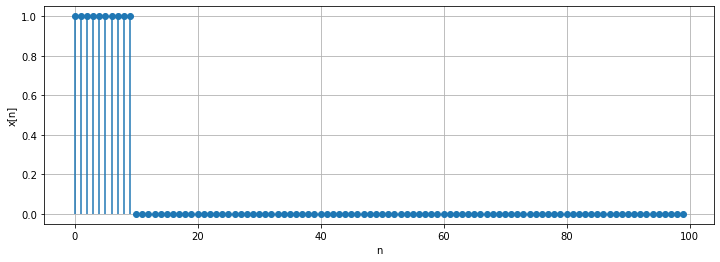

In [6]:
plt.figure(figsize=(12,4))
plt.stem(n, x, basefmt=" ")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid()
plt.show()

In [5]:
def plotfft(k,X,xlbl,tit):
    """Affichage d'une FFT (module et argument)"""
    plt.figure(figsize=(12,8))
    
    plt.subplot(2,1,1)
    plt.stem(k, abs(X), basefmt=" ")
    plt.ylabel("Module")
    plt.title(tit)
    plt.grid()
    
    plt.subplot(2,1,2)
    plt.stem(k, np.angle(X), basefmt=" ")
    plt.ylabel("Phase")
    plt.xlabel(xlbl)
    plt.grid()

## TFD entre $0$ et $N-1$

FFT est un algorithme très rapide pour calculer une transformée de Fourier discrète (TFD).
Il est implémenté en Python dans `scipy.fft.fft`.
Par défaut, FFT calcule une TFD entre $0$ et $N-1$.
Pour la représenter, il faut donc définir les abscisses $k$ entre $0$ et $N-1$.

NB : [What is the difference between numpy.fft and scipy.fftpack?](https://stackoverflow.com/questions/6363154/what-is-the-difference-between-numpy-fft-and-scipy-fftpack)

In [6]:
k = np.arange(N)
X = fft.fft(x)

N'oubliez pas : la TFD est très souvent complexe, c'est pourquoi on la représente avec deux graphes : le module et l'argument.

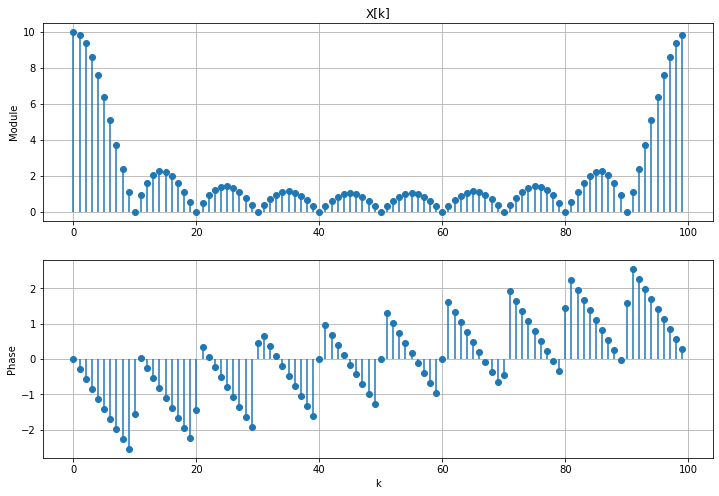

In [7]:
plotfft(k,X,"k","X[k]")

Dans certains cas, il peut y avoir des impulsions bizarres sur la phase :
ce sont des erreurs numériques que l'on peut supprimer
en forçant à 0 les échantillons de $X$ qui sont très faibles :

In [8]:
X[abs(X)<1e-9] = 0

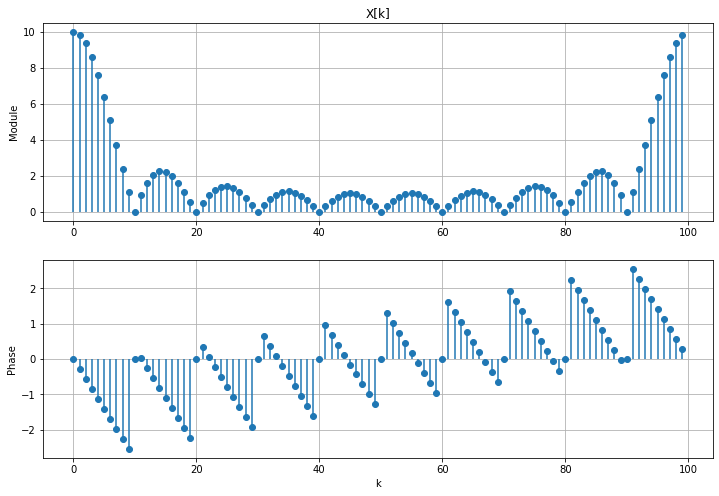

In [9]:
plotfft(k,X,"k","X[k]")

Le signal temporel étant un créneau, on peut l'interpréter comme un signal porte périodisé.
Par conséquent, le module de son spectre est bien la TFD d'une porte (un sinus cardinal) périodisé.

## TFD entre $-N/2$ et $N/2-1$

Il suffit de redéfinir les abscisses, et d'appliquer `scipy.fft.fftshift` sur le spectre pour inverser les parties gauche et droite.

In [10]:
k = np.arange(-N/2, N/2)
X = fft.fftshift(X)

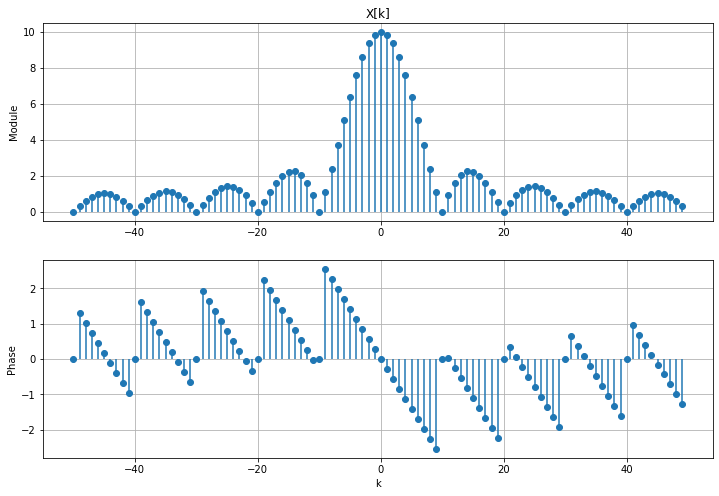

In [11]:
plotfft(k,X,"k","X[k]")

## TFD centrée en fonction des fréquences

Dans ce cas, le module et la phase du spectre ne changent pas.
Seule l'abscisse est à redéfinir.

In [14]:
Te = 2.5e-3
fe = 1/Te
f = k*fe/N

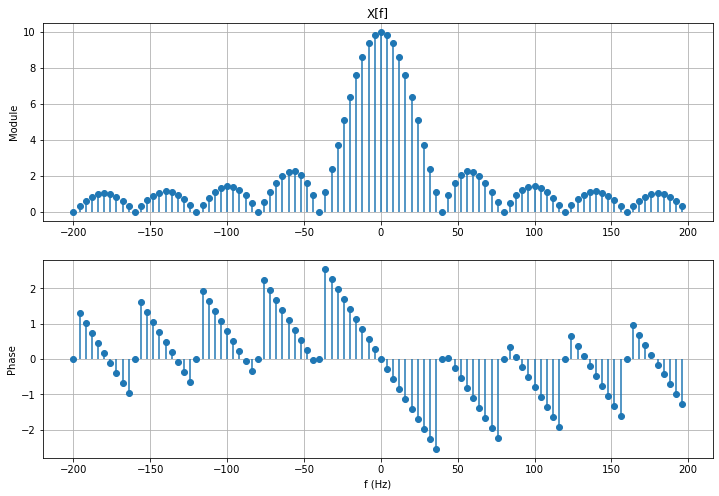

In [15]:
plotfft(f,X,"f (Hz)","X[f]")